# Forest Cover Type Prediction

## Exploratory Data Analysis

In [77]:
! pip install pandas_profiling

In [78]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [79]:
training_df = pd.read_csv('ForestTypes/train.csv')
training_df.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [80]:
print(training_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [81]:
testing_df = pd.read_csv('ForestTypes/test.csv')
testing_df.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# let's start by getting a sense for how our training and testing data are split
print(f'''Training data dimensions: {training_df.shape}.
Testing data dimensions: {testing_df.shape}.''')

Training data dimensions: (15120, 56).
Testing data dimensions: (565892, 55).


In [83]:
training_con_df = training_df[['Elevation' , 'Aspect' , 'Slope', 'Horizontal_Distance_To_Hydrology' , 'Vertical_Distance_To_Hydrology' ,'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]

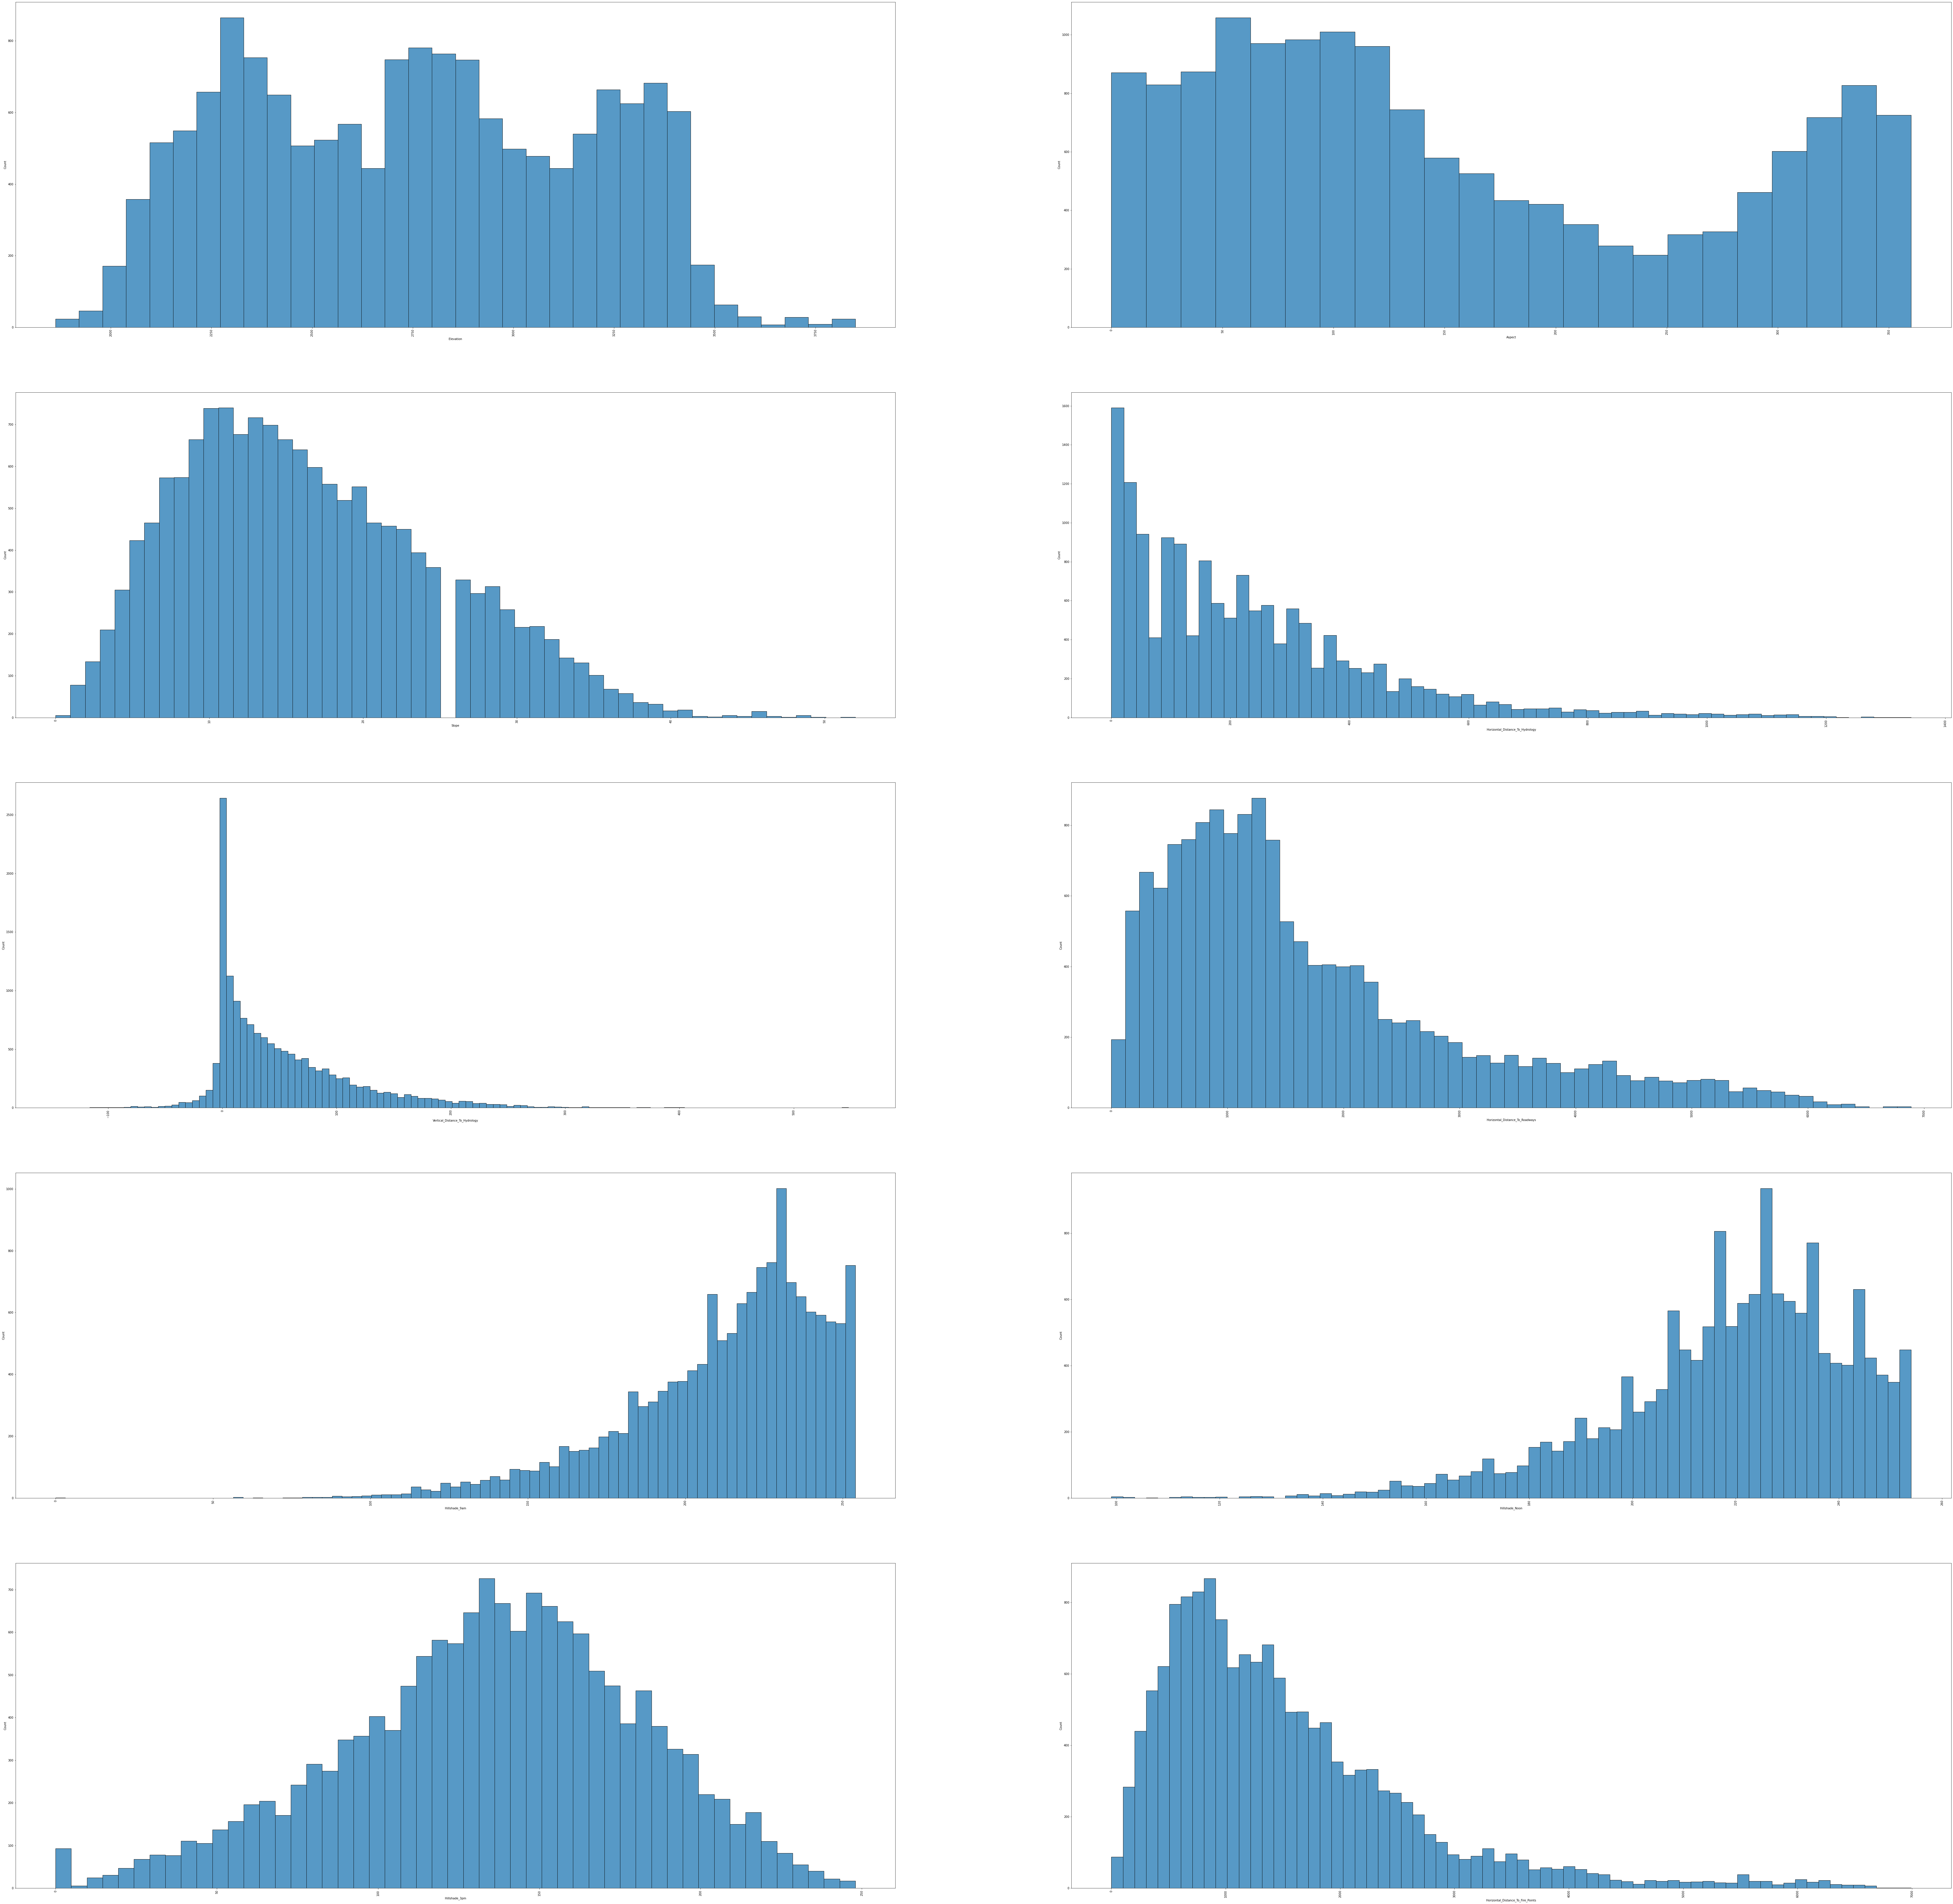

In [84]:
fig, ax = plt.subplots(5, 2, figsize=(120, 120))
for variable, subplot in zip(training_con_df, ax.flatten()):
    sns.histplot(training_con_df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [85]:
cor_mat = training_con_df.corr(method='pearson')

In [86]:
cor_mat.style.background_gradient(cmap='coolwarm')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


[Text(0, 0.5, 'Elevation'),
 Text(0, 1.5, 'Aspect'),
 Text(0, 2.5, 'Slope'),
 Text(0, 3.5, 'Horizontal_Distance_To_Hydrology'),
 Text(0, 4.5, 'Vertical_Distance_To_Hydrology'),
 Text(0, 5.5, 'Horizontal_Distance_To_Roadways'),
 Text(0, 6.5, 'Hillshade_9am'),
 Text(0, 7.5, 'Hillshade_Noon'),
 Text(0, 8.5, 'Hillshade_3pm'),
 Text(0, 9.5, 'Horizontal_Distance_To_Fire_Points')]

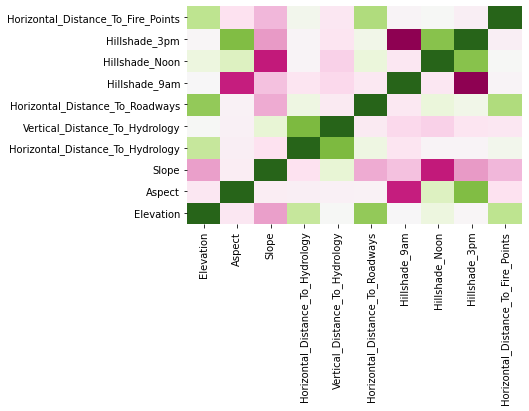

In [87]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(cor_mat, cmap=plt.cm.PiYG)
fig = plt.gcf()
ax.set_frame_on(False)
ax.set_yticks(np.arange(10) + 0.5, minor=False)
ax.set_xticks(np.arange(10) + 0.5, minor=False)
ax.set_xticklabels(cor_mat.columns, minor=False, rotation=90)
ax.set_yticklabels(cor_mat.columns, minor=False)

In [103]:
X_train = training_df.loc[:, training_df.columns != 'Cover_Type'].set_index('Id')
y_train = training_df[['Cover_Type']].values.ravel()

In [104]:
X_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,0
15117,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,0
15118,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X_test = testing_df.set_index('Id')
X_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581008,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,0
581009,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,0
581010,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,0


In [106]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 8):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"""k={k} – 
    Training Accuracy: {knn.score(X_train, y_train)}
    Testing Accuracy: 
    
    """)
    
    

k=1 – 
    Training Accuracy: 1.0
    Testing Accuracy: 
    
    
k=2 – 
    Training Accuracy: 0.9468253968253968
    Testing Accuracy: 
    
    
k=3 – 
    Training Accuracy: 0.9212962962962963
    Testing Accuracy: 
    
    
k=4 – 
    Training Accuracy: 0.9039021164021164
    Testing Accuracy: 
    
    
k=5 – 
    Training Accuracy: 0.8869708994708995
    Testing Accuracy: 
    
    
k=6 – 
    Training Accuracy: 0.874537037037037
    Testing Accuracy: 
    
    
k=7 – 
    Training Accuracy: 0.8623015873015873
    Testing Accuracy: 
    
    


In [116]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [117]:
write_df = pd.DataFrame({'Id' : X_test.index,
                        'Cover_Type' : y_pred}).set_index('Id')
write_df

,Cover_Type
Id,
15121,2
15122,2
15123,1
15124,1
15125,1
...,...
581008,3
581009,3
581010,3


In [118]:
write_df.to_csv('submission2_dml.csv')

In [142]:
import pandas as pd
import hvplot.pandas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(training_con_df)
scaled_df = pd.DataFrame(scaler.transform(training_con_df))
scaled_df.columns = training_con_df.columns

inertia = []
k_list = list(range(1, 12))

# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the home_sales_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the K-means model instance
for k in k_list:
    k_model = KMeans(n_clusters=k, random_state=1)
    k_model.fit(scaled_df)
    inertia.append(k_model.inertia_)

# Create a dictionary that holds the list values for k and inertia
elbow_data = {"k": k_list, "inertia": inertia}

# Create a DataFrame using the elbow_data dictionary
df_elbow = pd.DataFrame(elbow_data)

# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [143]:
scaled_df = pd.concat([scaled_df, 
                       training_df.drop(training_con_df.columns,
                                       axis=1)],
                     axis=1,
                     join='inner')

scaled_df


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,...,0,0,0,0,0,0,0,0,0,5
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,...,0,0,0,0,0,0,0,0,0,5
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,...,0,0,0,0,0,0,0,0,0,2
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,...,0,0,0,0,0,0,0,0,0,2
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,-0.340758,0.784172,0.768711,0.146639,-0.719765,-0.795476,-1.397379,1.404943,1.719366,-0.208335,...,0,0,0,0,0,0,0,0,0,3
15116,-0.350335,-0.324091,0.295543,1.931773,2.350255,-0.827173,1.187676,0.089223,-0.960742,-0.169240,...,0,0,0,0,0,0,0,0,0,3
15117,-0.616099,-0.205998,1.005295,0.655997,1.076523,-1.040755,1.220398,0.045366,-1.135058,-0.294706,...,0,0,0,0,0,0,0,0,0,3
15118,-0.628070,0.093779,1.360172,-0.043775,0.815245,-1.110942,0.533231,0.790940,-0.350637,-0.526545,...,0,0,0,0,0,0,0,0,0,3


In [144]:
k_model = KMeans(n_clusters=3, random_state=1)
k_model.fit(scaled_df)

KMeans(n_clusters=3, random_state=1)

In [146]:
clusters = k_model.predict(scaled_df)

In [147]:
scaled_df['Cluster'] = clusters
scaled_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Cluster
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,...,0,0,0,0,0,0,0,0,5,1
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,...,0,0,0,0,0,0,0,0,5,1
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,...,0,0,0,0,0,0,0,0,2,1
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,...,0,0,0,0,0,0,0,0,2,1
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,...,0,0,0,0,0,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,-0.340758,0.784172,0.768711,0.146639,-0.719765,-0.795476,-1.397379,1.404943,1.719366,-0.208335,...,0,0,0,0,0,0,0,0,3,0
15116,-0.350335,-0.324091,0.295543,1.931773,2.350255,-0.827173,1.187676,0.089223,-0.960742,-0.169240,...,0,0,0,0,0,0,0,0,3,0
15117,-0.616099,-0.205998,1.005295,0.655997,1.076523,-1.040755,1.220398,0.045366,-1.135058,-0.294706,...,0,0,0,0,0,0,0,0,3,0
15118,-0.628070,0.093779,1.360172,-0.043775,0.815245,-1.110942,0.533231,0.790940,-0.350637,-0.526545,...,0,0,0,0,0,0,0,0,3,0


In [149]:
pca_twodim = PCA(n_components=2)

In [151]:
pl = pd.DataFrame(np.array(scaled_df.sample(5000)))

#Rename plotX's columns since it was briefly converted to an np.array above
pl.columns = scaled_df.columns

In [153]:
pcs_twod = pd.DataFrame(pca_twodim.fit_transform(pl.drop(["Cluster"], axis=1)))
pcs_twod

,0,1
0,-5629.348881,-0.006005
1,-3717.349091,-1.961213
2,5474.651076,-0.362055
3,2906.651076,0.513306
4,6097.651182,1.041927
...,...,...
4995,2180.651120,-0.899059
4996,6905.651149,1.622412
4997,-6163.348990,1.301414
4998,4405.651180,-0.205899


In [154]:
pcs_twod.columns = ['PC1', 'PC2']
pcs_twod

,PC1,PC2
0,-5629.348881,-0.006005
1,-3717.349091,-1.961213
2,5474.651076,-0.362055
3,2906.651076,0.513306
4,6097.651182,1.041927
...,...,...
4995,2180.651120,-0.899059
4996,6905.651149,1.622412
4997,-6163.348990,1.301414
4998,4405.651180,-0.205899


In [156]:
pl = pd.concat([pl, pcs_twod], axis=1, join='inner')
pl

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Cluster,PC1,PC2
0,-0.738206,-0.651120,-0.414210,-1.081532,-0.834074,-0.864154,0.827731,-0.042349,-0.568531,-0.185605,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,-5629.348881,-0.006005
1,-0.290479,-1.041737,-0.532502,-0.491248,-0.376837,-0.821136,0.304176,-0.261636,-0.241689,-0.216517,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,-3717.349091,-1.961213
2,-1.774924,-1.096242,-1.715424,-1.081532,-0.834074,-1.021132,0.206009,0.659368,0.368417,-0.993861,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,5474.651076,-0.362055
3,-1.085375,1.492734,0.768711,-0.367479,0.292689,-0.563027,-1.855490,-0.305493,1.239997,-1.153875,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2906.651076,0.513306
4,0.159644,-0.741961,1.241880,-0.124701,-1.160672,-1.110942,0.925898,-1.840499,-1.875901,0.163517,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,6097.651182,1.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.073404,-0.369512,1.715048,-0.510290,0.145719,-1.067169,1.351287,-1.094925,-2.028428,0.256253,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2180.651120,-0.899059
4996,-0.326393,-1.068989,-0.887379,-0.881597,-0.768755,-0.776608,0.271454,0.001508,-0.045584,0.104421,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,6905.651149,1.622412
4997,-0.364701,0.511648,1.005295,-0.215148,0.292689,-0.534348,-0.775657,1.536514,1.174628,-0.237428,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-6163.348990,1.301414
4998,-1.578594,-1.087158,1.360172,-0.567414,-0.376837,-0.953209,-0.186657,-2.235215,-1.178637,-0.773841,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4405.651180,-0.205899


In [157]:
cluster0 = pl[pl["Cluster"] == 0]
cluster1 = pl[pl["Cluster"] == 1]
cluster2 = pl[pl["Cluster"] == 2]

In [159]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
                    x = cluster0["PC1"],
                    y = cluster0["PC2"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(128, 0, 0, 0.8)'),
                    text = None)

trace2 = go.Scatter(
                    x = cluster1["PC1"],
                    y = cluster1["PC2"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(0, 128, 0, 0.8)'),
                    text = None)

trace3 = go.Scatter(
                    x = cluster2["PC1"],
                    y = cluster2["PC2"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 0, 128, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "PCA Visualization in 2 Dimensions"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)